<a href="https://colab.research.google.com/github/LukynZa/Breast-cancer/blob/main/level_result_saga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
# imports
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import norm
from matplotlib import animation,rc
%matplotlib inline
import matplotlib.patches as mpatches
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
import warnings
warnings.filterwarnings('ignore')
from scipy import signal
import plotly.express as px
import io
import base64
from IPython.display import HTML, display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title
# data loading
dataset = pd.read_csv('/content/drive/MyDrive/bq-results-20231107-103146-1699353111738/bq-results-20231107-103146-1699353111738.csv', encoding='latin')
df = dataset.copy()

In [ ]:
# @title
# check 1st 5 rows
df.head()

,user_pseudo_id,event_date,event_timestamp,event_name,active_boosters_int,active_boosters_string,ga_session_id_int,ga_session_id_string,saga_id_int,saga_id_string,...,ga_session_number_int,ga_session_number_string,city_progress_int,city_progress_string,firebase_event_origin_int,firebase_event_origin_string,engaged_session_event_int,engaged_session_event_string,game_version_int,game_version_string
0,a553064986a1afba1ddce7719ad25fd7,20230917,1694993814625007,saga_end,NaN,NaN,1.694994e+09,NaN,NaN,TreasureHunt,...,20.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.8_Ads3_Eco 4_Eve0_Gam3_Gen0.5_Sag0_Sag0_Use...
1,975905335B3140B4BA9B0AADDC967FA2,20230917,1694994988696001,saga_end,NaN,NaN,1.694983e+09,NaN,NaN,TreasureHunt,...,28.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.8.1_Ver1_Gen0.5_Gam3_Ads3_Eco3_Usetrue_Eve0...
2,ec57d4a81bba5b7cd97a97077d06de96,20231001,1696203805135001,saga_end,NaN,NaN,1.696204e+09,NaN,NaN,TreasureHunt,...,8.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.8_Ads3_Eco3_Eve0_Gam3_Gen0.5_Sag0_Sag0_Uset...
3,a027305bad1d390c25c96847d615a8d0,20231001,1696196141367004,saga_end,NaN,NaN,1.696196e+09,NaN,NaN,TreasureHunt,...,110.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.7_
4,388d44b095b06fdc2f3dc49b6e034ef2,20230915,1694821564824004,saga_end,NaN,NaN,1.694822e+09,NaN,NaN,TreasureHunt,...,175.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.7_


In [ ]:
# check last 5 rows in DF
df.tail()

,user_pseudo_id,event_date,event_timestamp,event_name,active_boosters_int,active_boosters_string,ga_session_id_int,ga_session_id_string,saga_id_int,saga_id_string,...,ga_session_number_int,ga_session_number_string,city_progress_int,city_progress_string,firebase_event_origin_int,firebase_event_origin_string,engaged_session_event_int,engaged_session_event_string,game_version_int,game_version_string
10256,1ed2a8810a6cde10dfb3ca9933a6c7fe,20231006,1696615333767004,saga_end,NaN,NaN,1.696615e+09,NaN,NaN,Gnomy,...,15.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.8_Ads3_Eco 4_Eve0_Gam3_Gen0.5_Sag0_Sag0_Use...
10257,4be0df71210a783235eec7190bcc7c54,20231006,1696615747585009,saga_end,NaN,NaN,1.696616e+09,NaN,NaN,Gnomy,...,72.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.8_Ads3_Eco 4_Eve0_Gam3_Gen0.5_Sag0_Sag0_Use...
10258,5b0a016097fed993986872fab8f01b5e,20231006,1696609959179010,saga_end,NaN,NaN,1.696610e+09,NaN,NaN,Gnomy,...,115.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.7_Ads3_Eco 4_Eve0_Gam3_Gen0.5_Sag0_Sag0_Use...
10259,b4d998f90903bca1b92d5e6557841e39,20231030,1698688429894058,saga_end,NaN,NaN,1.698684e+09,NaN,NaN,BigSaga,...,89.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.9_Ads3_Eco 4_Eve0_Gam3_Gen0.5_Sag0_Sag0_Use...
10260,34b2a0792392d2b6c2a3b9e32ecf126e,20231031,1698743373846051,saga_end,NaN,NaN,1.698742e+09,NaN,NaN,BigSaga,...,703.0,NaN,NaN,NaN,NaN,app,1.0,NaN,NaN,v2.9_Ads3_Eco 4_Eve0_Gam3_Gen0.5_Sag0_Sag0_Use...


In [ ]:
# dataset
df.shape

(10261, 54)

In [ ]:
# column names and their data types
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

user_pseudo_id                   object
event_date                        int64
event_timestamp                   int64
event_name                       object
active_boosters_int             float64
active_boosters_string          float64
ga_session_id_int               float64
ga_session_id_string            float64
saga_id_int                     float64
saga_id_string                   object
saga_tap_int                      int64
saga_tap_string                 float64
saga_start_date_int             float64
saga_start_date_string           object
games_win_int                     int64
games_win_string                float64
firebase_screen_id_int          float64
firebase_screen_id_string       float64
saga_sink_int                     int64
saga_sink_string                float64
plus_five_int                   float64
plus_five_string                float64
firebase_error_int              float64
firebase_error_string           float64
move_back_int                   float64


In [ ]:
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

user_pseudo_id.........0
event_date.........0
event_timestamp.........0
event_name.........0
active_boosters_int.........10261
active_boosters_string.........10261
ga_session_id_int.........1
ga_session_id_string.........10261
saga_id_int.........10261
saga_id_string.........0
saga_tap_int.........0
saga_tap_string.........10261
saga_start_date_int.........10261
saga_start_date_string.........0
games_win_int.........0
games_win_string.........10261
firebase_screen_id_int.........564
firebase_screen_id_string.........10261
saga_sink_int.........0
saga_sink_string.........10261
plus_five_int.........10174
plus_five_string.........10261
firebase_error_int.........10174
firebase_error_string.........10261
move_back_int.........10174
move_back_string.........10261
currency_count_int.........0
currency_count_string.........10261
firebase_screen_class_int.........10261
firebase_screen_class_string.........564
error_value_int.........10261
error_value_string.........10174
pet_food_int.........

In [ ]:
# Uvádíme seznam sloupců, které chceme odstranit
sloupce_k_odstraneni = [
    'active_boosters_int', 'active_boosters_string', 'ga_session_id_string',
    'saga_id_int', 'saga_tap_string', 'saga_start_date_int', 'games_win_string',
    'firebase_screen_id_int', 'firebase_screen_id_string', 'saga_sink_string',
    'plus_five_int', 'plus_five_string', 'firebase_error_int', 'firebase_error_string',
    'move_back_int', 'move_back_string', 'currency_count_string', 'firebase_screen_class_int',
    'firebase_screen_class_string', 'error_value_int', 'error_value_string', 'pet_food_int',
    'pet_food_string', 'wild_int', 'wild_string', 'games_started_string', 'city_int',
    'session_string', 'coins_string', 'ga_session_number_string', 'city_progress_int',
    'city_progress_string', 'firebase_event_origin_int', 'engaged_session_event_string',
    'game_version_int'
]

# Odstraníme uvedené sloupce z DataFrame df
df.drop(columns=sloupce_k_odstraneni, inplace=True)


In [ ]:
# @title
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

user_pseudo_id.........0
event_date.........0
event_timestamp.........0
event_name.........0
ga_session_id_int.........1
saga_id_string.........0
saga_tap_int.........0
saga_start_date_string.........0
games_win_int.........0
saga_sink_int.........0
currency_count_int.........0
games_started_int.........0
city_string.........87
session_int.........0
coins_int.........0
ga_session_number_int.........1
firebase_event_origin_string.........0
engaged_session_event_int.........38
game_version_string.........87


In [ ]:
# @title
# Pokud máte DataFrame df, zobrazíme jedinečné hodnoty ve sloupci "saga_id_string"
jedinecne_hodnoty = df['saga_id_string'].unique()

# Vytiskneme jedinečné hodnoty
for hodnota in jedinecne_hodnoty:
    print(hodnota)


TreasureHunt
Gnomy
BigSaga


In [ ]:
# @title


# Pokud máte DataFrame df, spočítáme počet výskytů jednotlivých hodnot ve sloupci "saga_id_string"
pocty_vyskytu = df['saga_id_string'].value_counts()

# Výsledek bude obsahovat počty výskytů pro jednotlivé hodnoty
print(pocty_vyskytu)


TreasureHunt    5524
Gnomy           4735
BigSaga            2
Name: saga_id_string, dtype: int64


In [ ]:
# @title
import pandas as pd

# Předpokládáme, že máte DataFrame, ve kterém je sloupec "saga_id_string"
# Zde je příklad, jak načíst DataFrame, pokud máte data v CSV souboru
# df = pd.read_csv('nazev_souboru.csv')

# Pokud máte DataFrame df, odstraníme řádky s hodnotami odlišnými od "BigSaga"
df = df[df['saga_id_string'] == 'Gnomy']

# Výsledek bude obsahovat pouze řádky, kde "saga_id_string" je "BigSaga"


In [ ]:
# @title
# Pokud máte DataFrame df, zobrazíme jedinečné hodnoty ve sloupci "saga_id_string"
jedinecne_hodnoty = df['saga_id_string'].unique()

# Vytiskneme jedinečné hodnoty
for hodnota in jedinecne_hodnoty:
    print(hodnota)

Gnomy


# GNOMY analytika (saga15)

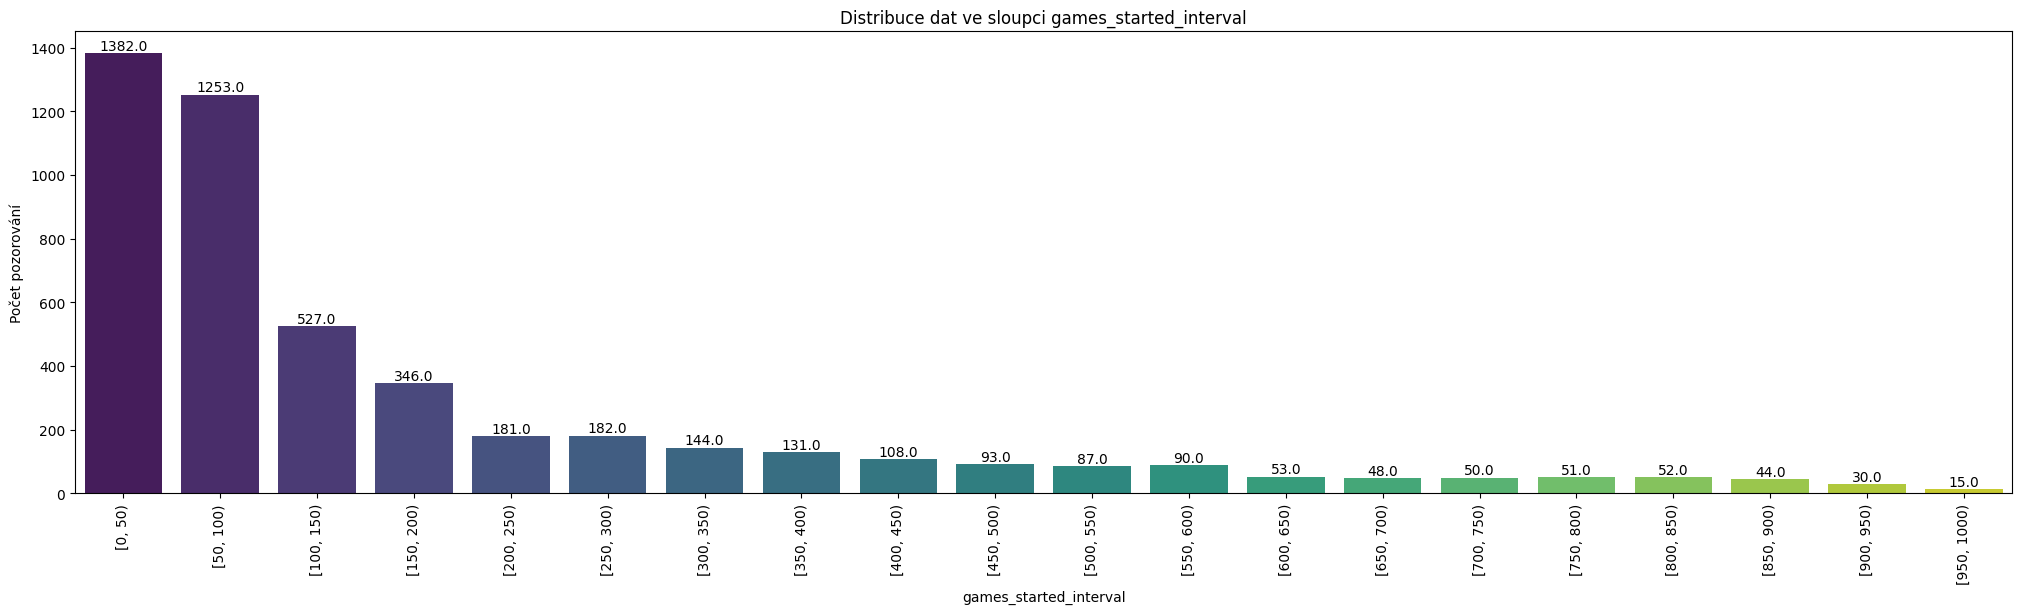

In [ ]:
# @title
# Filtrace dat tak, aby obsahovala pouze hodnoty do 1000 včetně
df_filtered = df[df['games_started_int'] <= 1000]

# Vytvoření nového sloupce s rozdělením po 50 pro games_started_int
df_filtered['games_started_interval'] = pd.cut(df_filtered['games_started_int'], bins=range(0, 1001, 50), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='games_started_interval', palette='viridis')
plt.xlabel('games_started_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci games_started_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


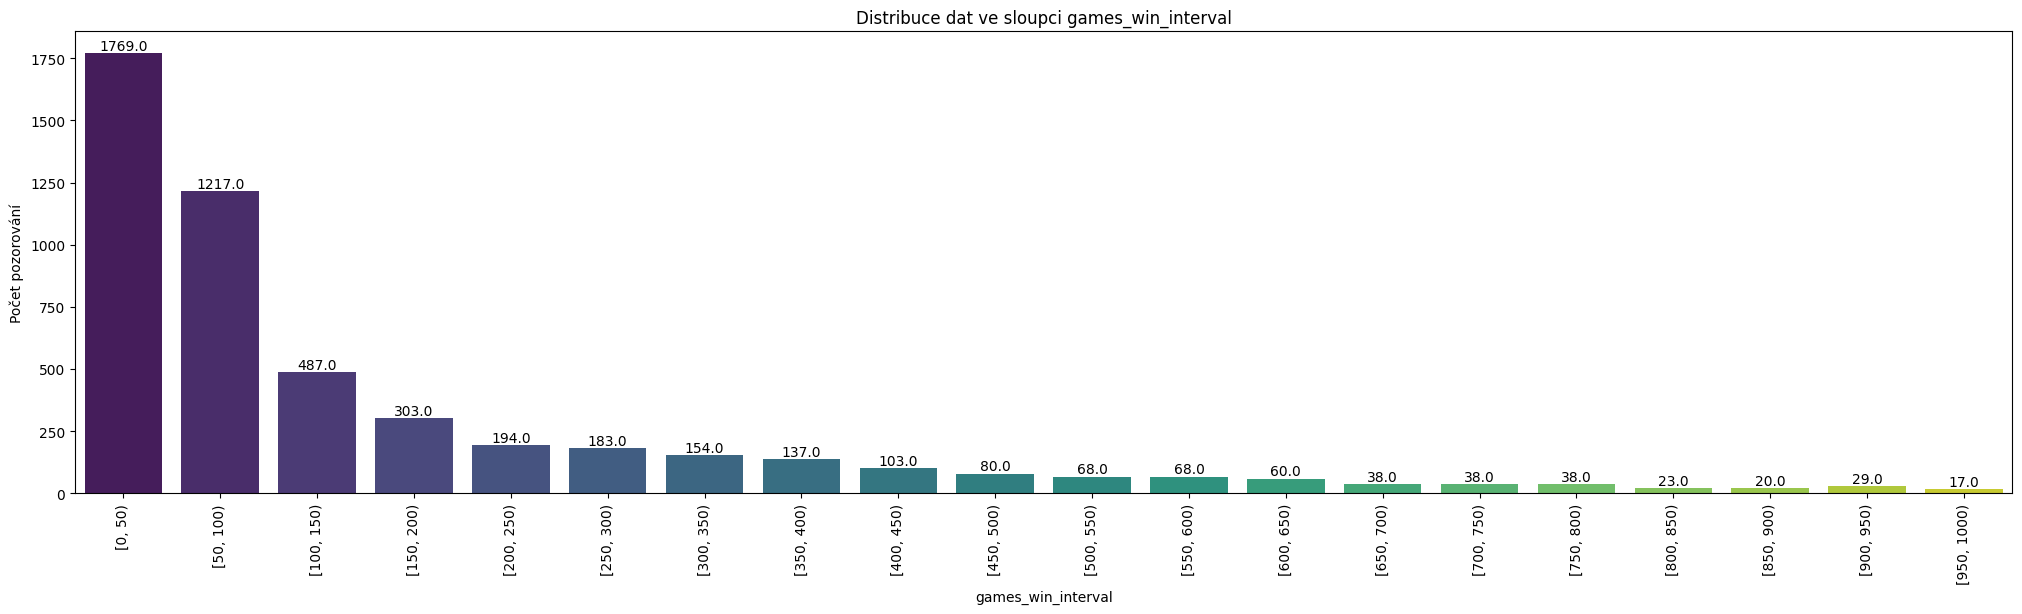

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 1000 včetně
df_filtered = df[df['games_win_int'] <= 1000]

# Vytvoření nového sloupce s rozdělením po 50 pro games_win_int
df_filtered['games_win_interval'] = pd.cut(df_filtered['games_win_int'], bins=range(0, 1001, 50), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='games_win_interval', palette='viridis')
plt.xlabel('games_win_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci games_win_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


todo: proč četnost games_win převyšuje games_started?

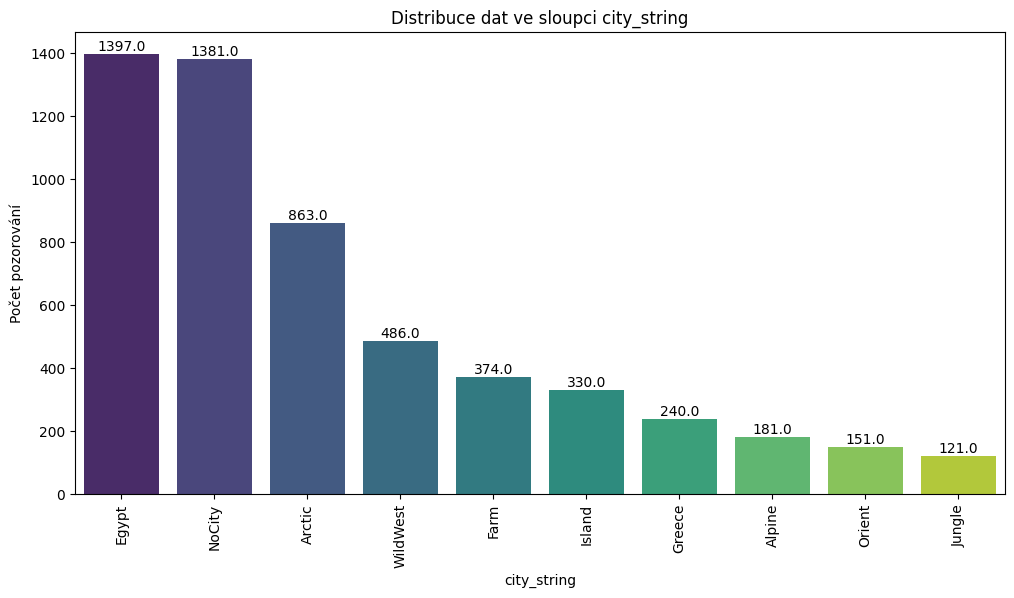

In [ ]:
# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat pro sloupec 'city_string'
ax = sns.countplot(data=df, x='city_string', palette='viridis', order=df['city_string'].value_counts().index)
plt.xlabel('city_string')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci city_string')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


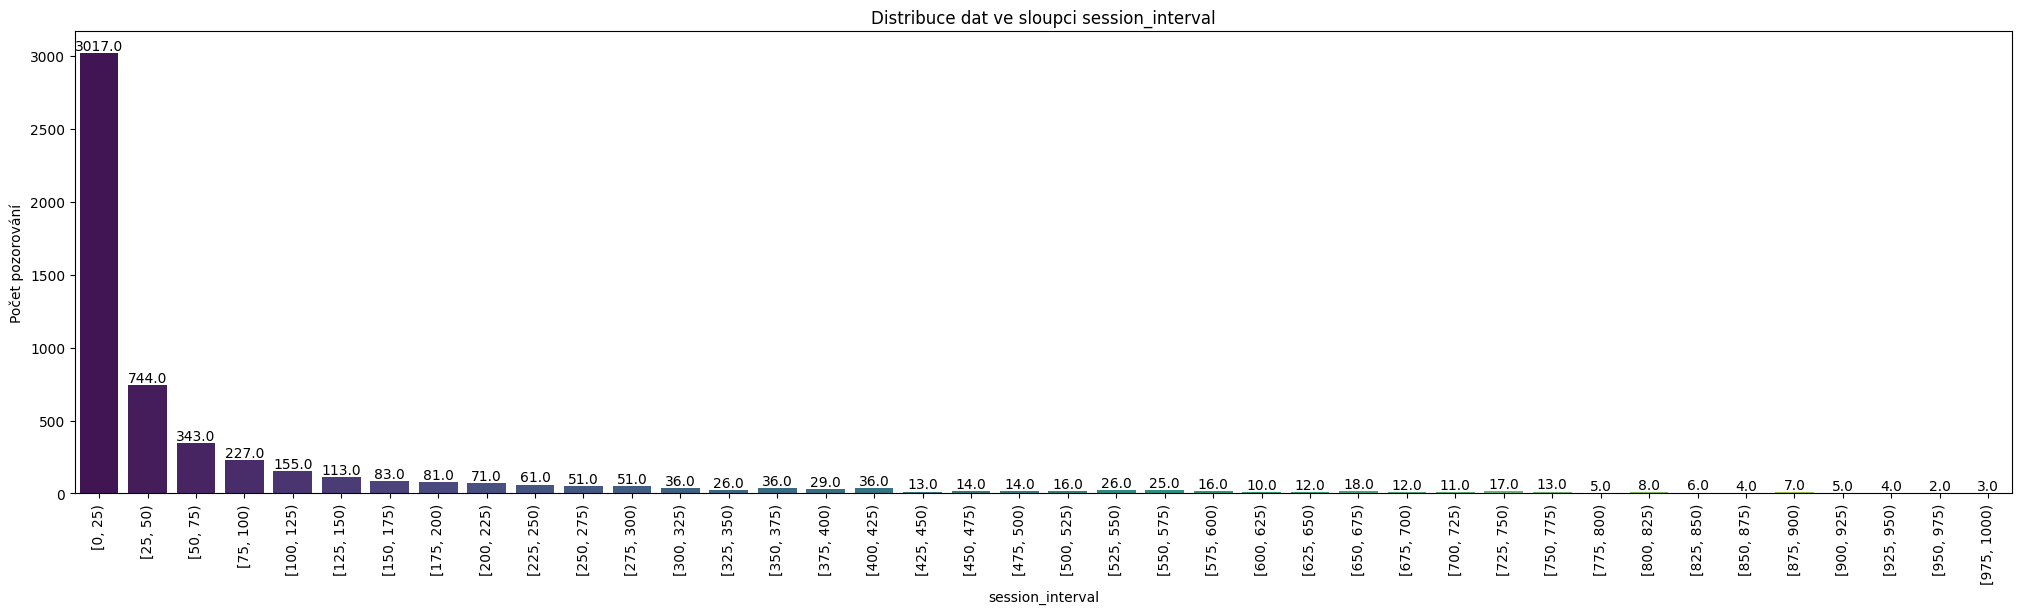

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 1000 včetně
df_filtered = df[df['session_int'] <= 1000]

# Vytvoření nového sloupce s rozdělením po 25 pro session_int
df_filtered['session_interval'] = pd.cut(df_filtered['session_int'], bins=range(0, 1001, 25), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='session_interval', palette='viridis')
plt.xlabel('session_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci session_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


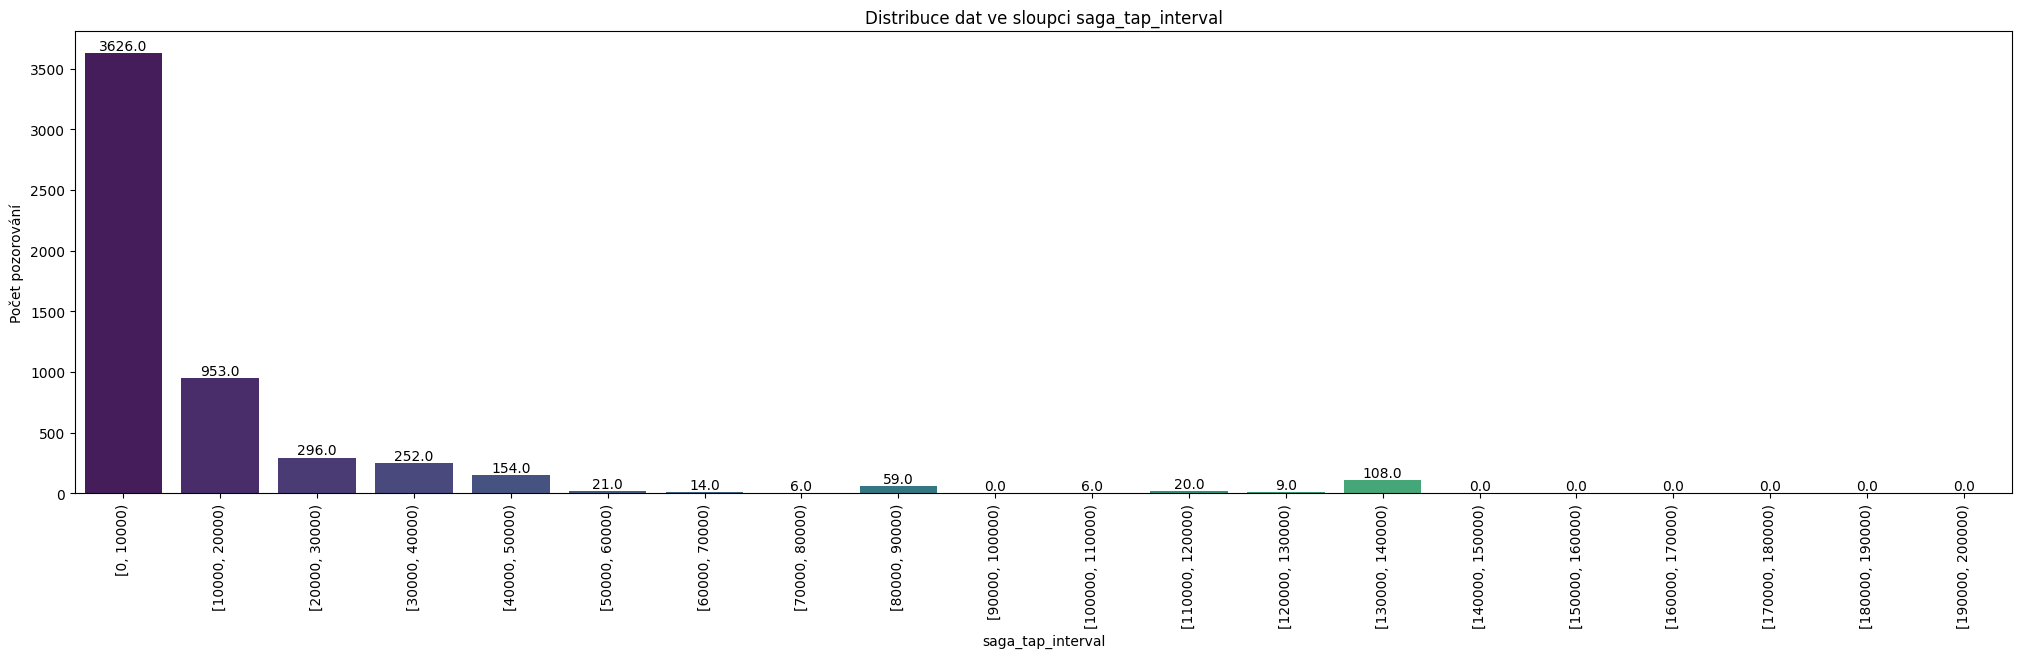

In [ ]:


# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_tap_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_tap_int
df_filtered['saga_tap_interval'] = pd.cut(df_filtered['saga_tap_int'], bins=range(0, 200001, 10000), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='saga_tap_interval', palette='viridis')
plt.xlabel('saga_tap_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_tap_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


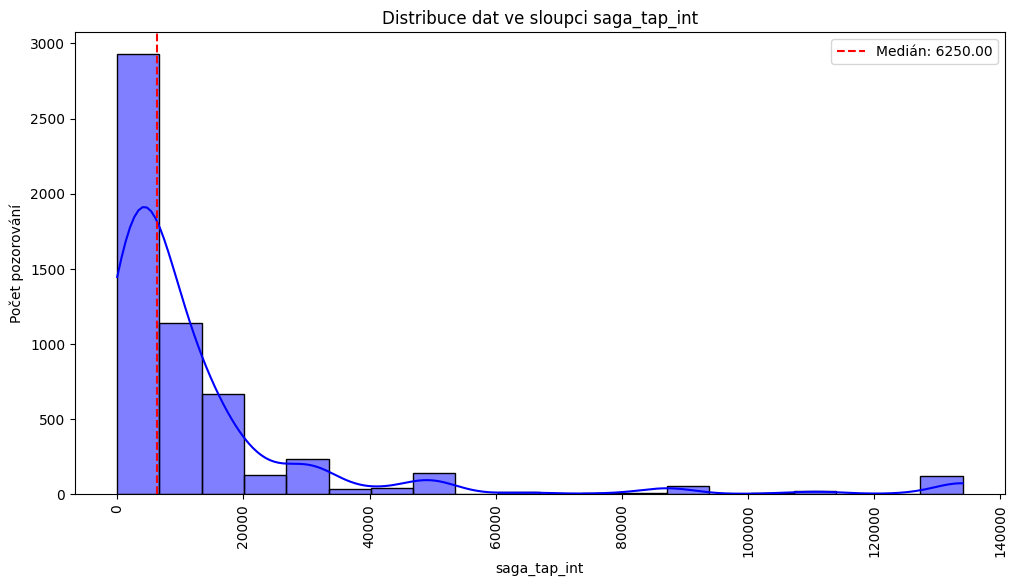

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_tap_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_tap_int
df_filtered['saga_tap_interval'] = pd.cut(df_filtered['saga_tap_int'], bins=range(0, 200001, 10000), right=False)

# Získání mediánu pro sloupec saga_tap_int
median_value = df_filtered['saga_tap_int'].median()

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.histplot(data=df_filtered, x='saga_tap_int', bins=20, kde=True, color='blue')
plt.xlabel('saga_tap_int')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_tap_int')
plt.xticks(rotation=90)

# Přidání vertikální červené čáry označující medián
plt.axvline(x=median_value, color='red', linestyle='--', label=f'Medián: {median_value:.2f}')
plt.legend()

plt.show()


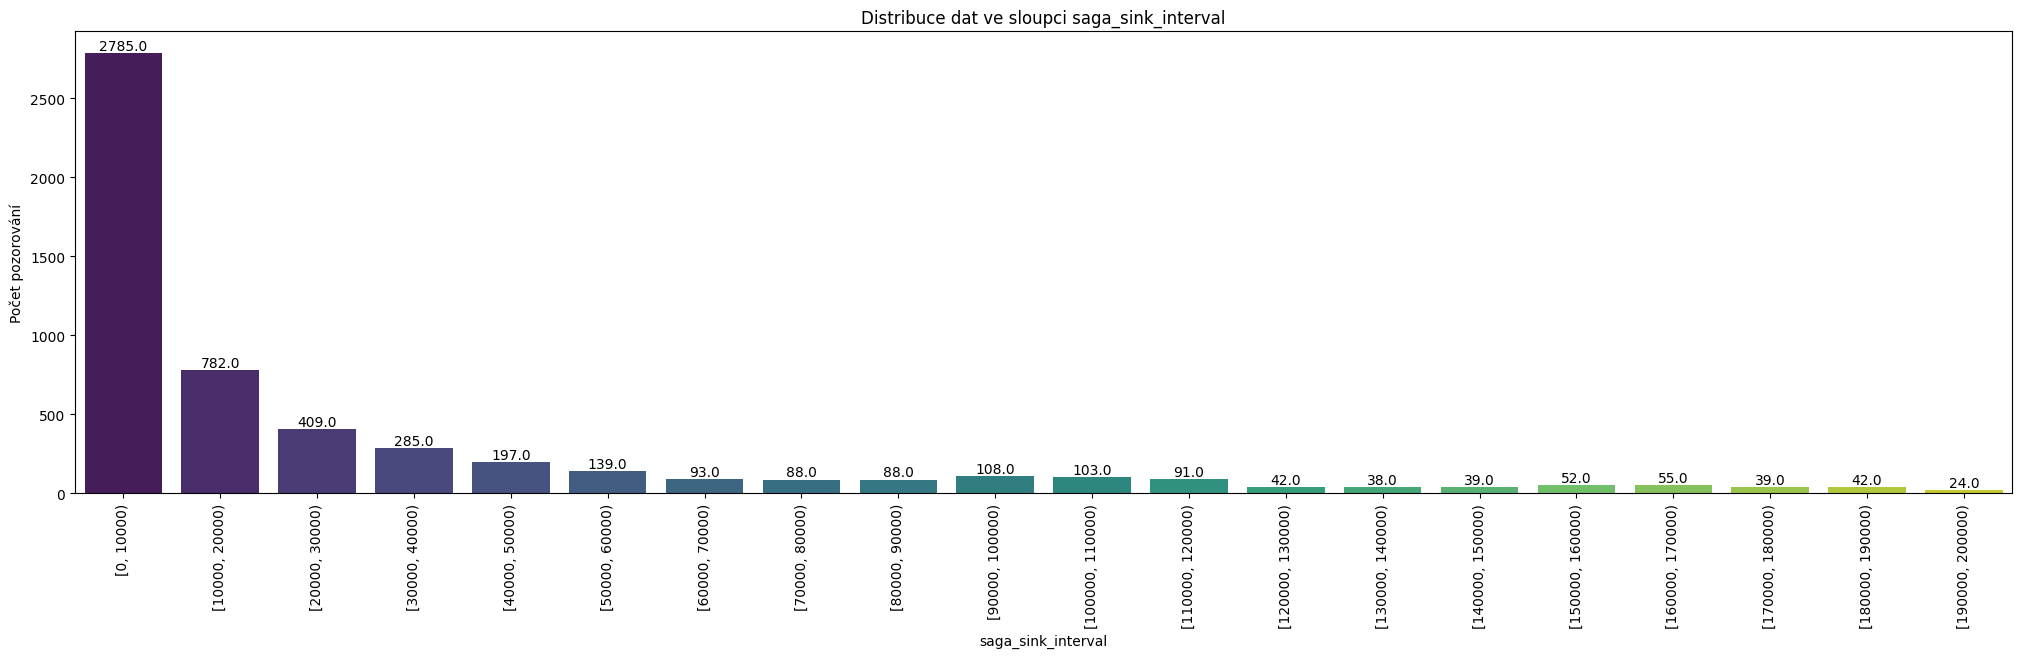

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_sink_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_sink_int
df_filtered['saga_sink_interval'] = pd.cut(df_filtered['saga_sink_int'], bins=range(0, 200001, 10000), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='saga_sink_interval', palette='viridis')
plt.xlabel('saga_sink_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_sink_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


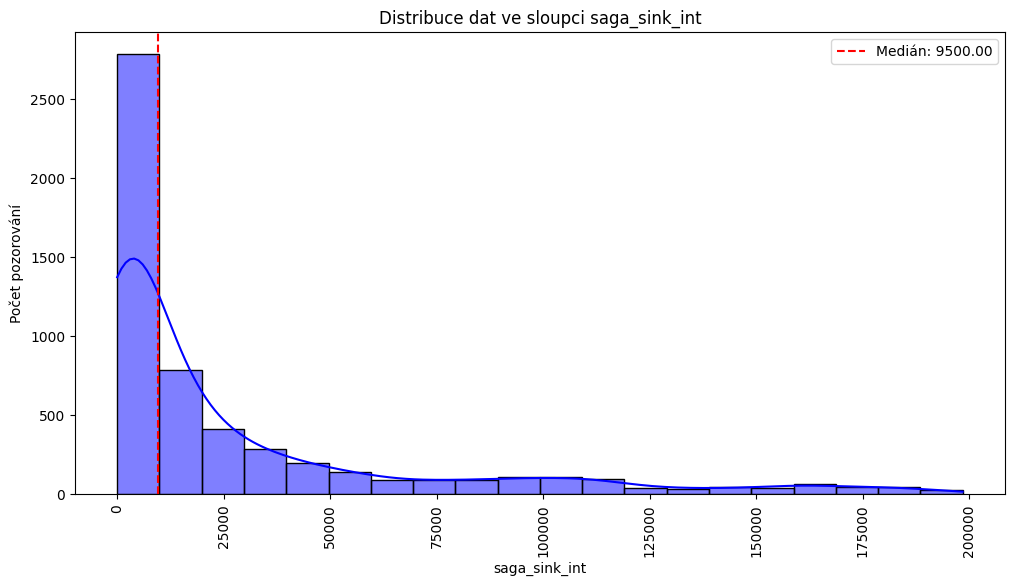

In [ ]:

# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered_sink = df[df['saga_sink_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_sink_int
df_filtered_sink['saga_sink_interval'] = pd.cut(df_filtered_sink['saga_sink_int'], bins=range(0, 200001, 10000), right=False)

# Získání mediánu pro sloupec saga_sink_int
median_value_sink = df_filtered_sink['saga_sink_int'].median()

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.histplot(data=df_filtered_sink, x='saga_sink_int', bins=20, kde=True, color='blue')
plt.xlabel('saga_sink_int')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_sink_int')
plt.xticks(rotation=90)

# Přidání vertikální červené čáry označující medián
plt.axvline(x=median_value_sink, color='red', linestyle='--', label=f'Medián: {median_value_sink:.2f}')
plt.legend()

plt.show()


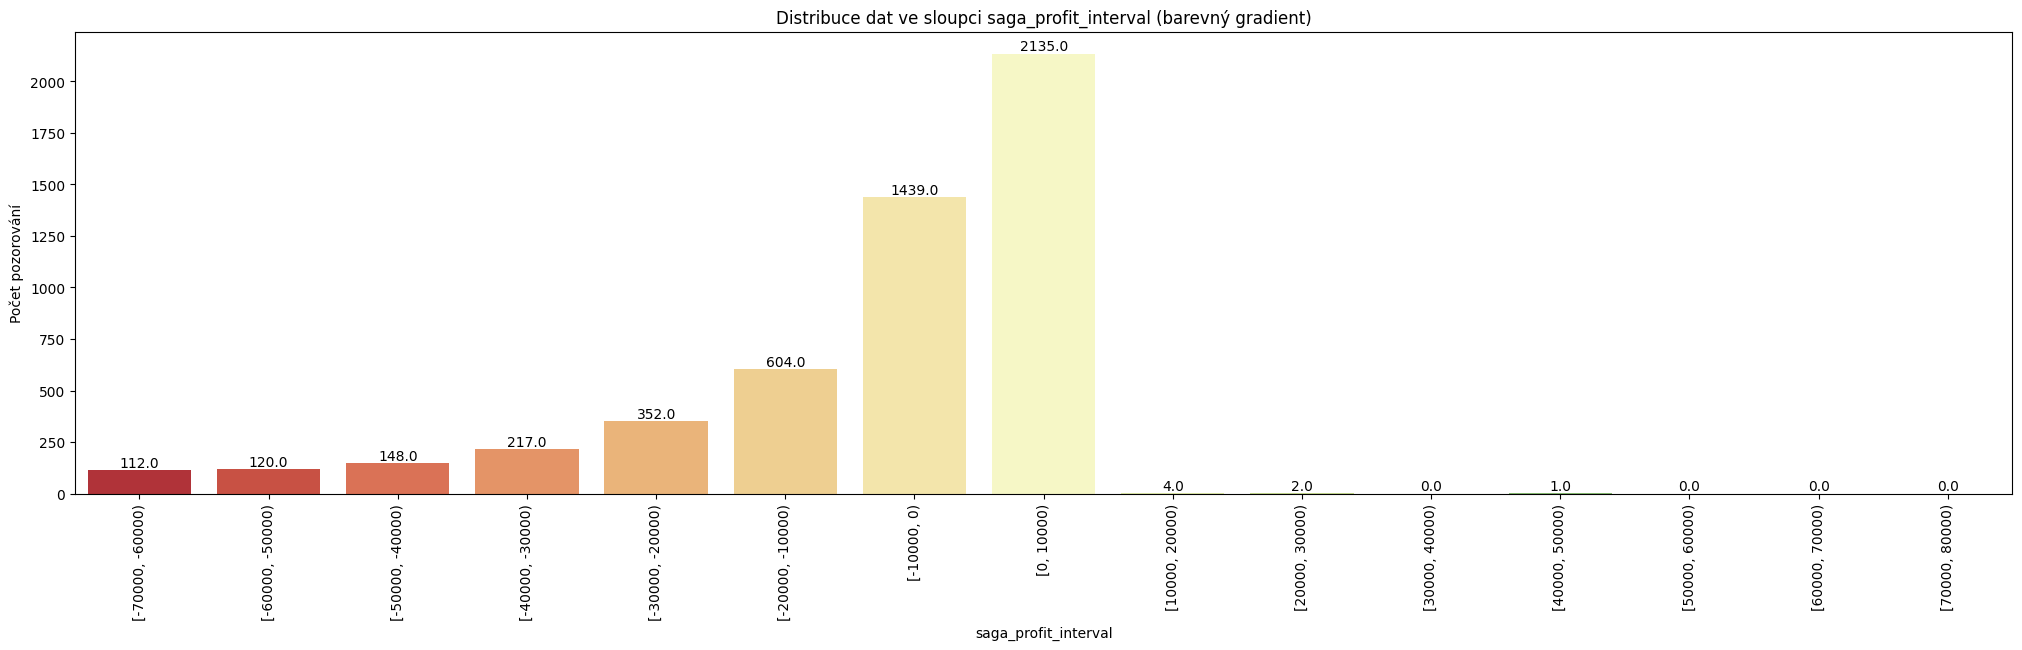

In [ ]:
# Vytvoření sloupce saga_profit_int jako rozdílu mezi saga_tap_int a saga_sink_int
df['saga_profit_int'] = df['saga_tap_int'] - df['saga_sink_int']

# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_sink_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_profit_int
df_filtered['saga_profit_interval'] = pd.cut(df_filtered['saga_profit_int'], bins=range(-70000, 80001, 10000), right=False)

# Seřazení hodnot na ose x od nejmenšího rozsahu po nejvyšší
df_filtered['saga_profit_interval'] = df_filtered['saga_profit_interval'].cat.reorder_categories(
    df_filtered['saga_profit_interval'].value_counts().index, ordered=True)

# Vytvoření gradientní palety barev na základě hodnoty rozsahu
color_palette = sns.color_palette("RdYlGn", len(df_filtered['saga_profit_interval'].cat.categories))

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci s nastavenými barvami
ax = sns.countplot(data=df_filtered, x='saga_profit_interval', palette=color_palette)
plt.xlabel('saga_profit_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_profit_interval (barevný gradient)')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


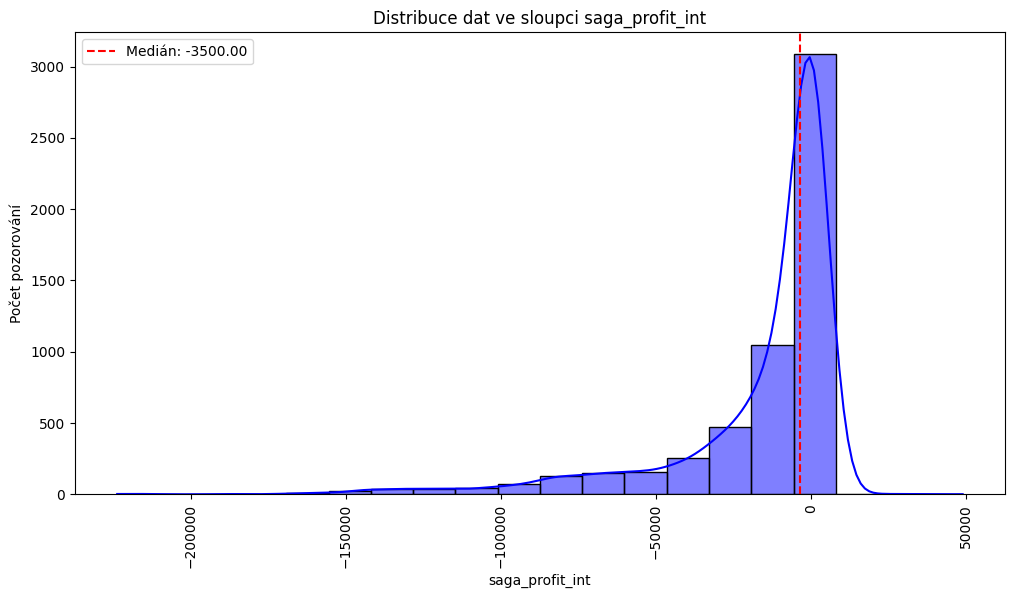

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně pro sloupec saga_profit_int
df_filtered_profit = df[df['saga_profit_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_profit_int
df_filtered_profit['saga_profit_interval'] = pd.cut(df_filtered_profit['saga_profit_int'], bins=range(-70000, 80001, 10000), right=False)

# Získání mediánu pro sloupec saga_profit_int
median_value_profit = df_filtered_profit['saga_profit_int'].median()

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.histplot(data=df_filtered_profit, x='saga_profit_int', bins=20, kde=True, color='blue')
plt.xlabel('saga_profit_int')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_profit_int')
plt.xticks(rotation=90)

# Přidání vertikální červené čáry označující medián
plt.axvline(x=median_value_profit, color='red', linestyle='--', label=f'Medián: {median_value_profit:.2f}')
plt.legend()

plt.show()


In [ ]:
median_saga_profit = df['saga_profit_int'].median()
print(f'Medián pro sloupec saga_profit_int: {median_saga_profit:.2f}')


Medián pro sloupec saga_profit_int: -3500.00


In [ ]:
mean_saga_profit = df['saga_profit_int'].mean()
print(f'Průměr pro sloupec saga_profit_int: {mean_saga_profit:.2f}')


Průměr pro sloupec saga_profit_int: -16017.02


# FUNNEL

In [ ]:
# data loading
dataset = pd.read_csv('/content/drive/MyDrive/bq-results-20231107-115754-1699358284840/bq-results-20231107-115754-1699358284840.csv', encoding='latin')
funnel = dataset.copy()

In [ ]:
funnel.shape

(15, 2)

In [ ]:
funnel.head

<bound method NDFrame.head of    saga_game_start_event  pocet_uzivatelu
0      saga_game_start_0             2257
1     saga_game_start_12              551
2      saga_game_start_1             1843
3     saga_game_start_13              533
4      saga_game_start_2             1649
5      saga_game_start_6              942
6      saga_game_start_4             1104
7      saga_game_start_9              622
8      saga_game_start_7              765
9     saga_game_start_11              562
10    saga_game_start_10              584
11     saga_game_start_3             1366
12     saga_game_start_8              701
13     saga_game_start_5             1021
14    saga_game_start_14              526>

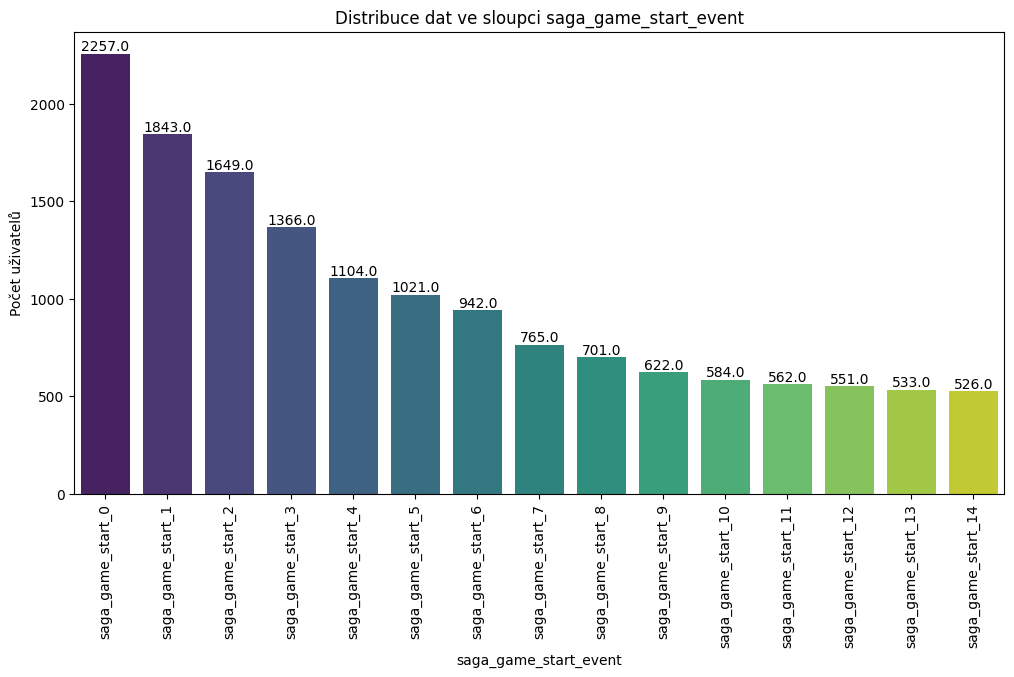

In [ ]:
# Seřazení dat dle sloupce 'pocet_uzivatelu'
funnel_sorted = funnel.sort_values(by='pocet_uzivatelu', ascending=False)

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření sloupcového grafu pro vizualizaci dat
ax = sns.barplot(data=funnel_sorted, x='saga_game_start_event', y='pocet_uzivatelu', palette='viridis')
plt.xlabel('saga_game_start_event')
plt.ylabel('Počet uživatelů')
plt.title('Distribuce dat ve sloupci saga_game_start_event')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


# TreasureHunt

In [ ]:
# data loading
dataset = pd.read_csv('/content/drive/MyDrive/bq-results-20231107-103146-1699353111738/bq-results-20231107-103146-1699353111738.csv', encoding='latin')
df = dataset.copy()

In [ ]:
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

user_pseudo_id.........0
event_date.........0
event_timestamp.........0
event_name.........0
active_boosters_int.........10261
active_boosters_string.........10261
ga_session_id_int.........1
ga_session_id_string.........10261
saga_id_int.........10261
saga_id_string.........0
saga_tap_int.........0
saga_tap_string.........10261
saga_start_date_int.........10261
saga_start_date_string.........0
games_win_int.........0
games_win_string.........10261
firebase_screen_id_int.........564
firebase_screen_id_string.........10261
saga_sink_int.........0
saga_sink_string.........10261
plus_five_int.........10174
plus_five_string.........10261
firebase_error_int.........10174
firebase_error_string.........10261
move_back_int.........10174
move_back_string.........10261
currency_count_int.........0
currency_count_string.........10261
firebase_screen_class_int.........10261
firebase_screen_class_string.........564
error_value_int.........10261
error_value_string.........10174
pet_food_int.........

In [ ]:
# Uvádíme seznam sloupců, které chceme odstranit
sloupce_k_odstraneni = [
    'active_boosters_int', 'active_boosters_string', 'ga_session_id_string',
    'saga_id_int', 'saga_tap_string', 'saga_start_date_int', 'games_win_string',
    'firebase_screen_id_int', 'firebase_screen_id_string', 'saga_sink_string',
    'plus_five_int', 'plus_five_string', 'firebase_error_int', 'firebase_error_string',
    'move_back_int', 'move_back_string', 'currency_count_string', 'firebase_screen_class_int',
    'firebase_screen_class_string', 'error_value_int', 'error_value_string', 'pet_food_int',
    'pet_food_string', 'wild_int', 'wild_string', 'games_started_string', 'city_int',
    'session_string', 'coins_string', 'ga_session_number_string', 'city_progress_int',
    'city_progress_string', 'firebase_event_origin_int', 'engaged_session_event_string',
    'game_version_int'
]

# Odstraníme uvedené sloupce z DataFrame df
df.drop(columns=sloupce_k_odstraneni, inplace=True)

In [ ]:
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

user_pseudo_id.........0
event_date.........0
event_timestamp.........0
event_name.........0
ga_session_id_int.........1
saga_id_string.........0
saga_tap_int.........0
saga_start_date_string.........0
games_win_int.........0
saga_sink_int.........0
currency_count_int.........0
games_started_int.........0
city_string.........87
session_int.........0
coins_int.........0
ga_session_number_int.........1
firebase_event_origin_string.........0
engaged_session_event_int.........38
game_version_string.........87


In [ ]:
# Pokud máte DataFrame df, zobrazíme jedinečné hodnoty ve sloupci "saga_id_string"
jedinecne_hodnoty = df['saga_id_string'].unique()

# Vytiskneme jedinečné hodnoty
for hodnota in jedinecne_hodnoty:
    print(hodnota)


TreasureHunt
Gnomy
BigSaga


In [ ]:
# Pokud máte DataFrame df, spočítáme počet výskytů jednotlivých hodnot ve sloupci "saga_id_string"
pocty_vyskytu = df['saga_id_string'].value_counts()

# Výsledek bude obsahovat počty výskytů pro jednotlivé hodnoty
print(pocty_vyskytu)


TreasureHunt    5524
Gnomy           4735
BigSaga            2
Name: saga_id_string, dtype: int64


In [ ]:
import pandas as pd

# Předpokládáme, že máte DataFrame, ve kterém je sloupec "saga_id_string"
# Zde je příklad, jak načíst DataFrame, pokud máte data v CSV souboru
# df = pd.read_csv('nazev_souboru.csv')

# Pokud máte DataFrame df, odstraníme řádky s hodnotami odlišnými od "TreasureHunt"
df = df[df['saga_id_string'] == 'TreasureHunt']

# Výsledek bude obsahovat pouze řádky, kde "saga_id_string" je "TreasureHunt"

In [ ]:
# Pokud máte DataFrame df, spočítáme počet výskytů jednotlivých hodnot ve sloupci "saga_id_string"
pocty_vyskytu = df['saga_id_string'].value_counts()

# Výsledek bude obsahovat počty výskytů pro jednotlivé hodnoty
print(pocty_vyskytu)

TreasureHunt    5524
Name: saga_id_string, dtype: int64


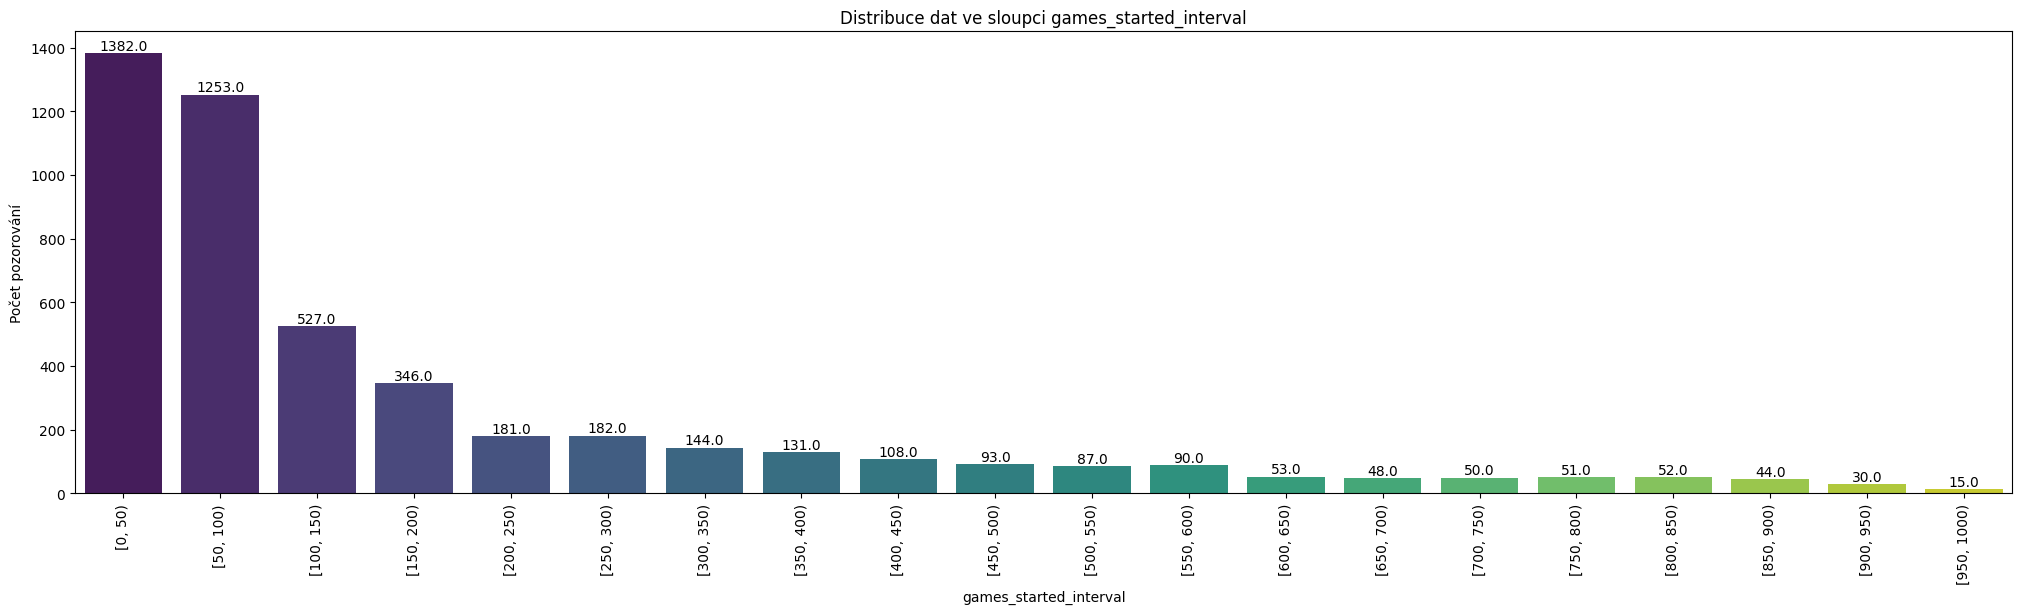

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 1000 včetně
df_filtered = df[df['games_started_int'] <= 1000]

# Vytvoření nového sloupce s rozdělením po 50 pro games_started_int
df_filtered['games_started_interval'] = pd.cut(df_filtered['games_started_int'], bins=range(0, 1001, 50), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='games_started_interval', palette='viridis')
plt.xlabel('games_started_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci games_started_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

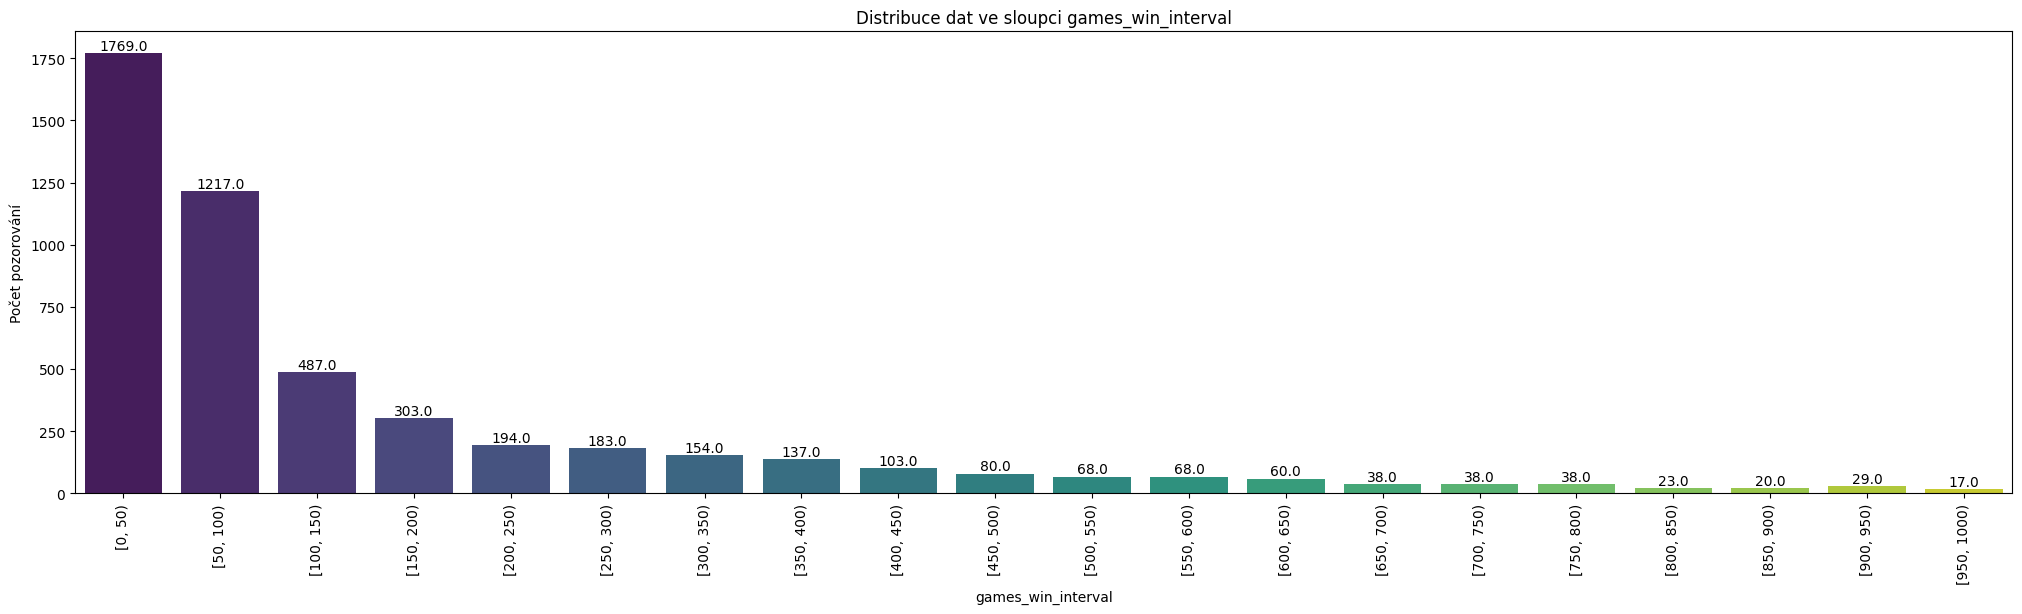

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 1000 včetně
df_filtered = df[df['games_win_int'] <= 1000]

# Vytvoření nového sloupce s rozdělením po 50 pro games_win_int
df_filtered['games_win_interval'] = pd.cut(df_filtered['games_win_int'], bins=range(0, 1001, 50), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='games_win_interval', palette='viridis')
plt.xlabel('games_win_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci games_win_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

todo: proč četnost games_win převyšuje games_started?

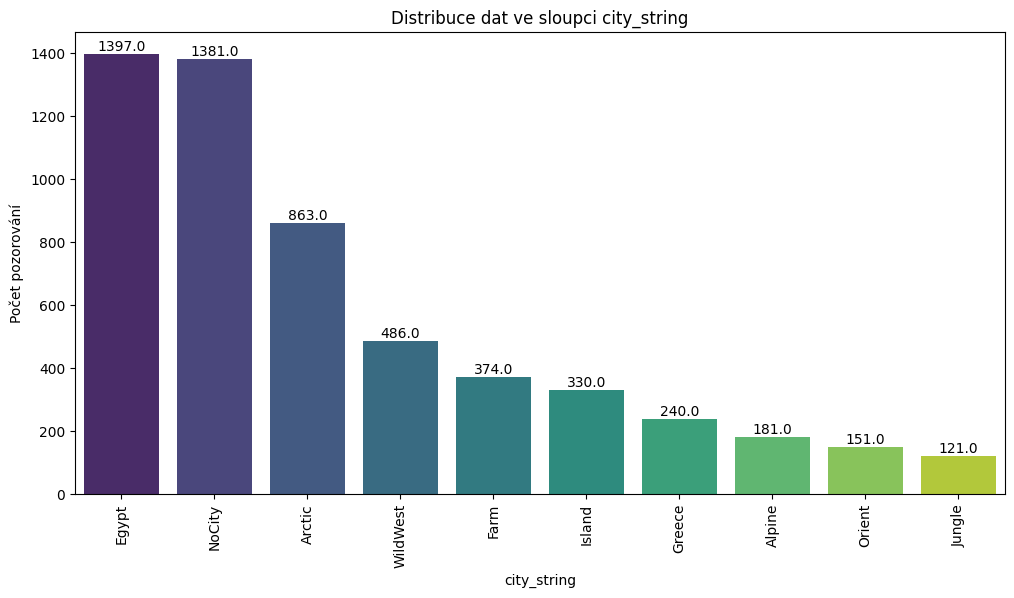

In [ ]:
# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat pro sloupec 'city_string'
ax = sns.countplot(data=df, x='city_string', palette='viridis', order=df['city_string'].value_counts().index)
plt.xlabel('city_string')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci city_string')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

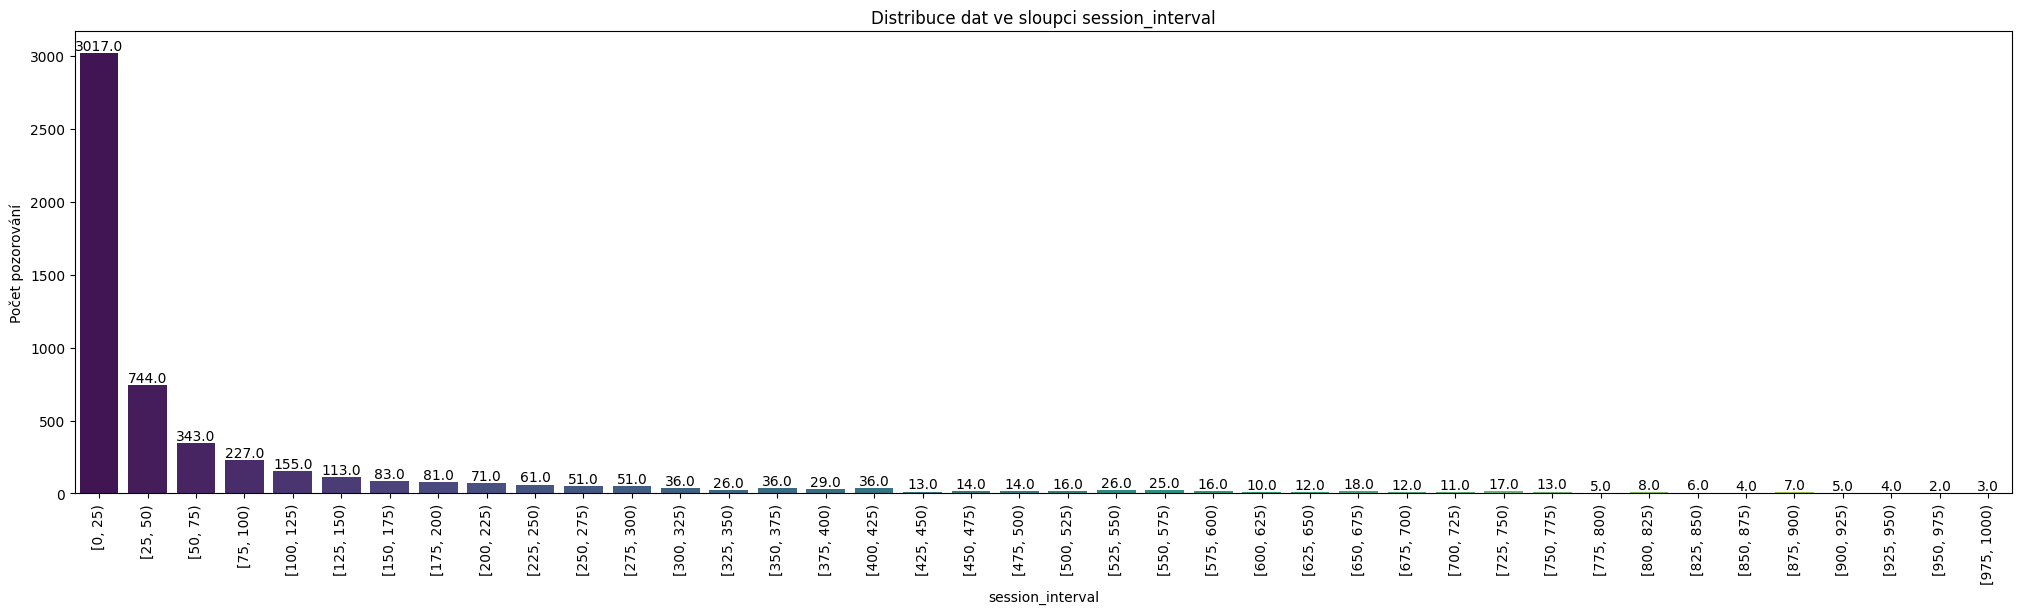

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 1000 včetně
df_filtered = df[df['session_int'] <= 1000]

# Vytvoření nového sloupce s rozdělením po 25 pro session_int
df_filtered['session_interval'] = pd.cut(df_filtered['session_int'], bins=range(0, 1001, 25), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='session_interval', palette='viridis')
plt.xlabel('session_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci session_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


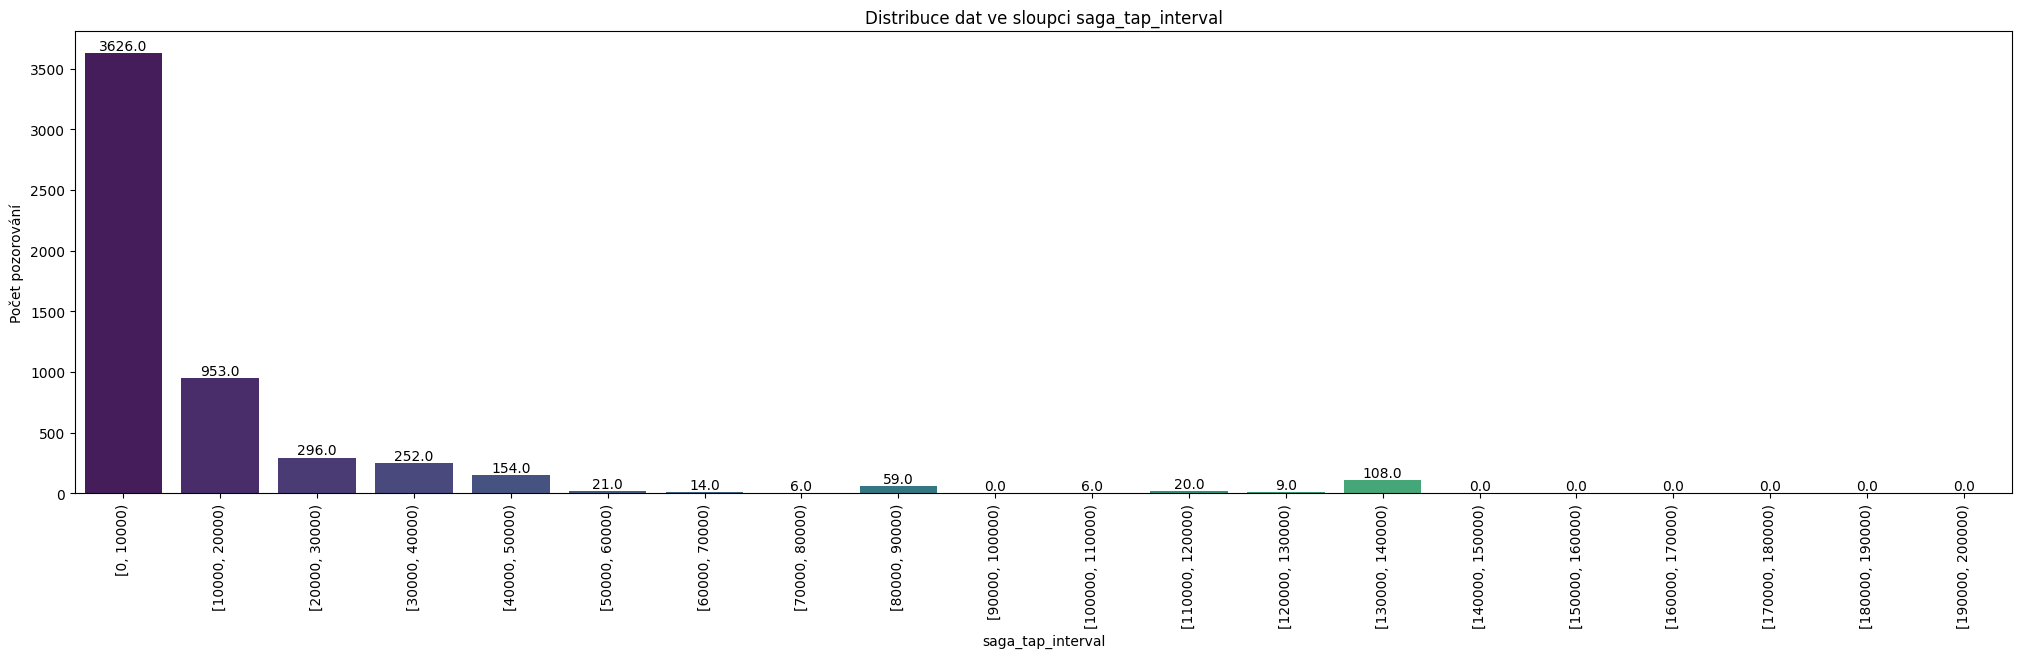

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_tap_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_tap_int
df_filtered['saga_tap_interval'] = pd.cut(df_filtered['saga_tap_int'], bins=range(0, 200001, 10000), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='saga_tap_interval', palette='viridis')
plt.xlabel('saga_tap_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_tap_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

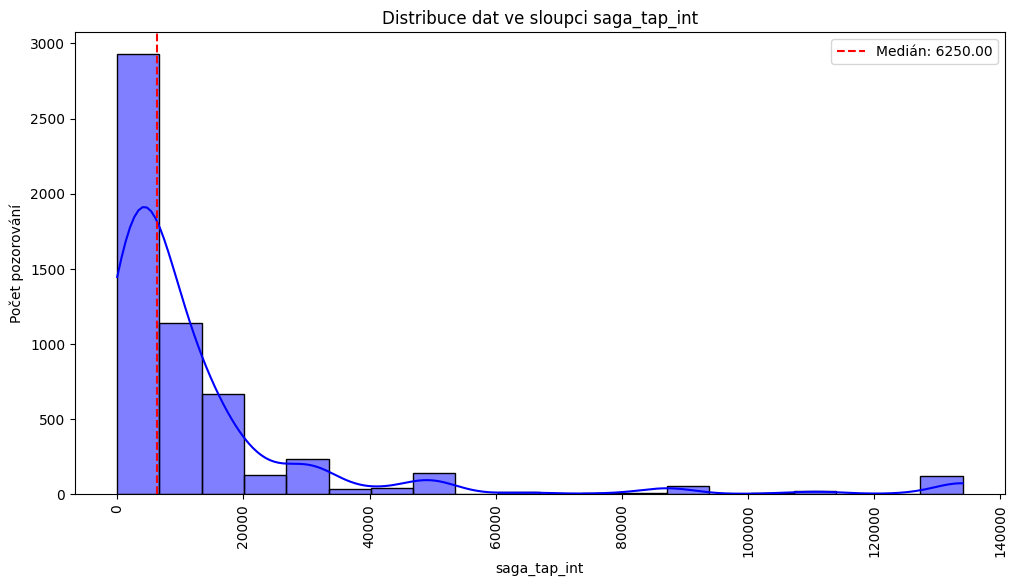

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_tap_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_tap_int
df_filtered['saga_tap_interval'] = pd.cut(df_filtered['saga_tap_int'], bins=range(0, 200001, 10000), right=False)

# Získání mediánu pro sloupec saga_tap_int
median_value = df_filtered['saga_tap_int'].median()

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.histplot(data=df_filtered, x='saga_tap_int', bins=20, kde=True, color='blue')
plt.xlabel('saga_tap_int')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_tap_int')
plt.xticks(rotation=90)

# Přidání vertikální červené čáry označující medián
plt.axvline(x=median_value, color='red', linestyle='--', label=f'Medián: {median_value:.2f}')
plt.legend()

plt.show()

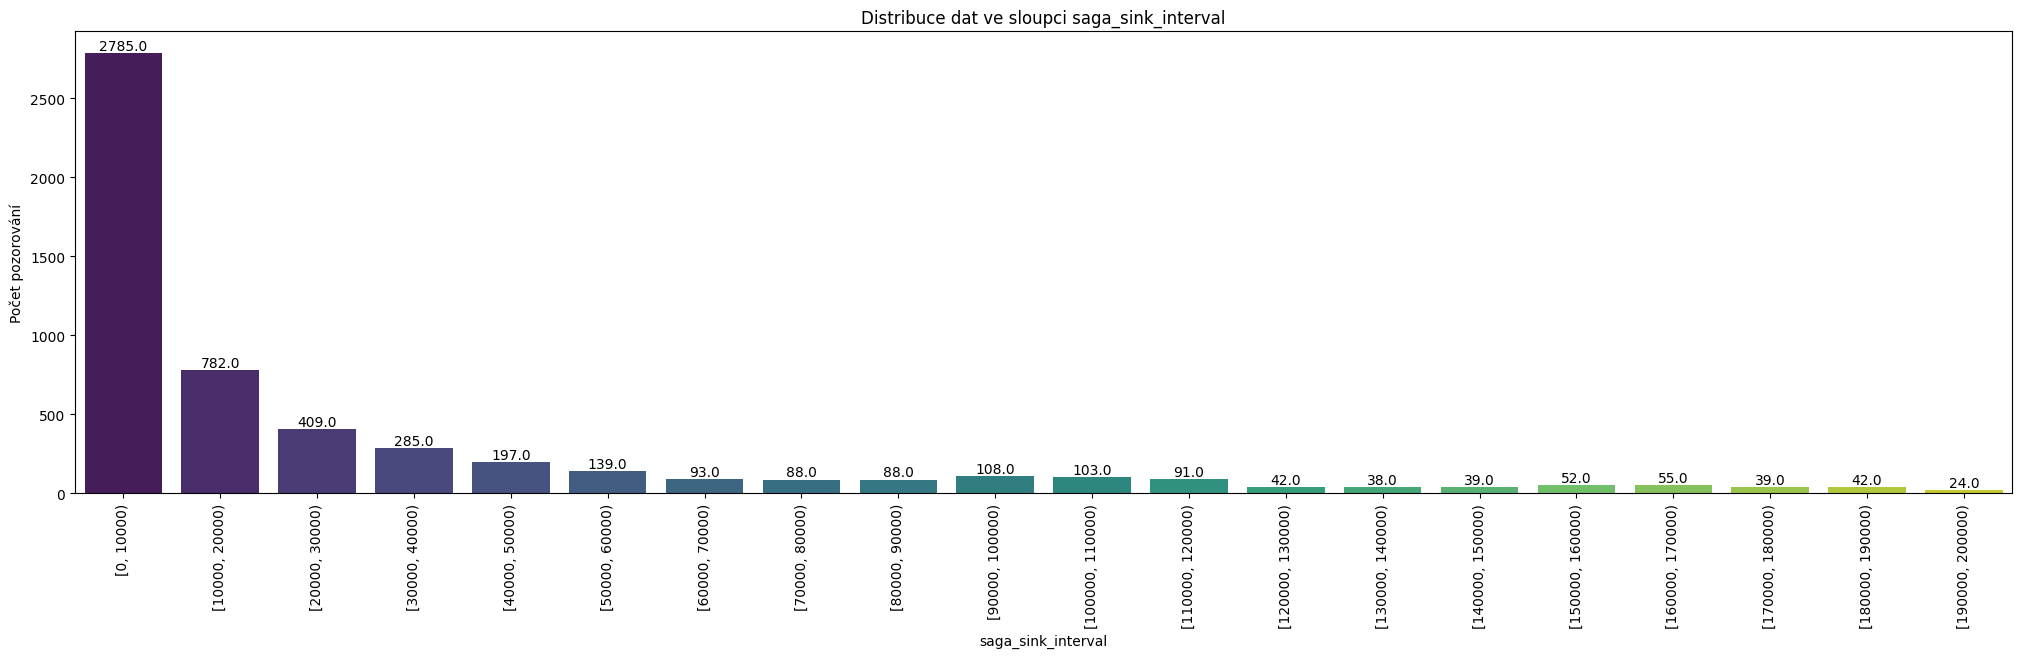

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_sink_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_sink_int
df_filtered['saga_sink_interval'] = pd.cut(df_filtered['saga_sink_int'], bins=range(0, 200001, 10000), right=False)

# Zvětšení šířky grafu
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.countplot(data=df_filtered, x='saga_sink_interval', palette='viridis')
plt.xlabel('saga_sink_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_sink_interval')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

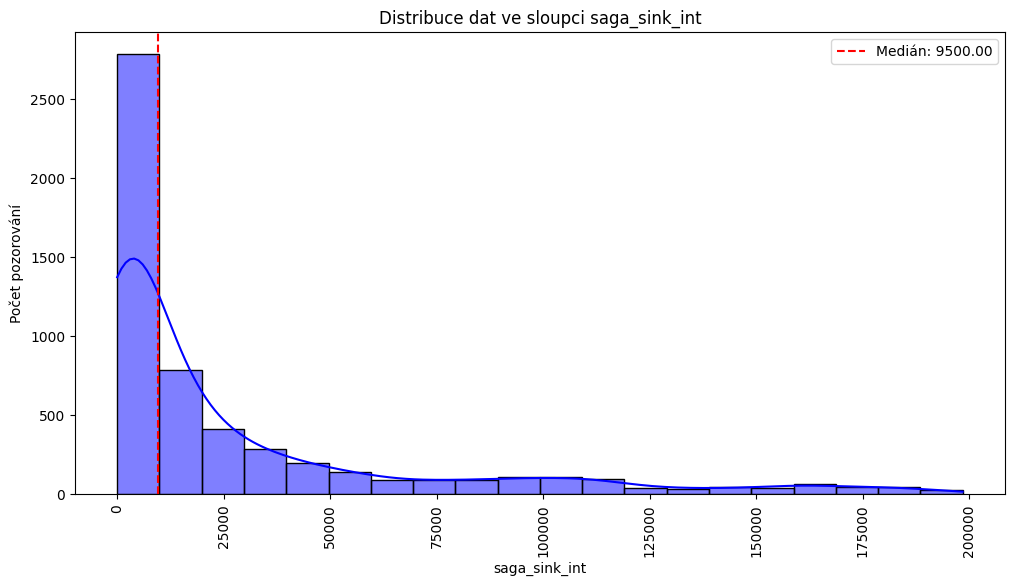

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered_sink = df[df['saga_sink_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_sink_int
df_filtered_sink['saga_sink_interval'] = pd.cut(df_filtered_sink['saga_sink_int'], bins=range(0, 200001, 10000), right=False)

# Získání mediánu pro sloupec saga_sink_int
median_value_sink = df_filtered_sink['saga_sink_int'].median()

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.histplot(data=df_filtered_sink, x='saga_sink_int', bins=20, kde=True, color='blue')
plt.xlabel('saga_sink_int')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_sink_int')
plt.xticks(rotation=90)

# Přidání vertikální červené čáry označující medián
plt.axvline(x=median_value_sink, color='red', linestyle='--', label=f'Medián: {median_value_sink:.2f}')
plt.legend()

plt.show()

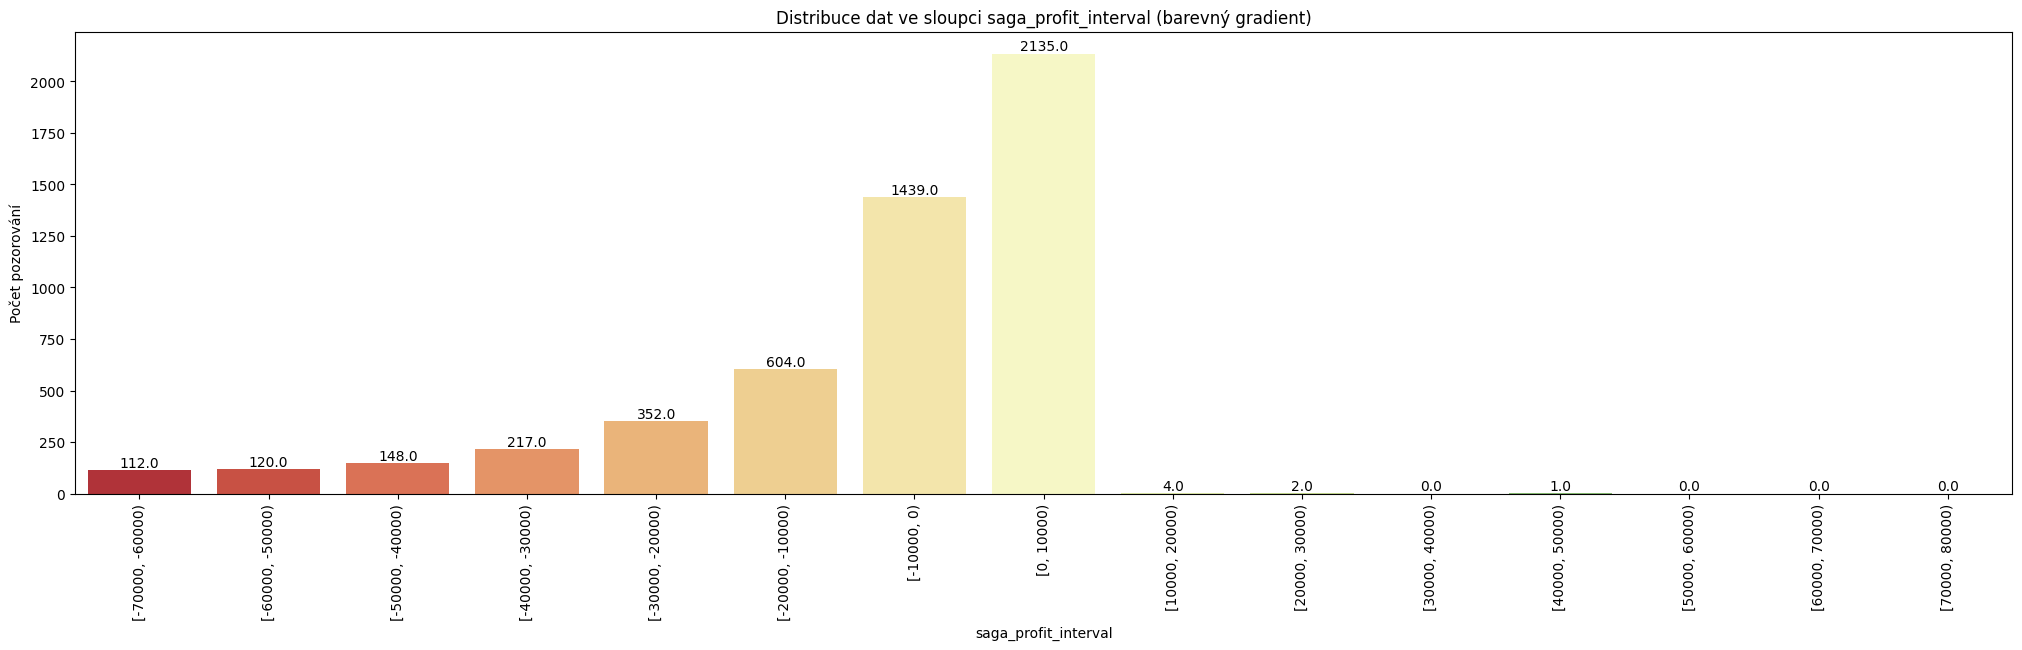

In [ ]:
# Vytvoření sloupce saga_profit_int jako rozdílu mezi saga_tap_int a saga_sink_int
df['saga_profit_int'] = df['saga_tap_int'] - df['saga_sink_int']

# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně
df_filtered = df[df['saga_sink_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_profit_int
df_filtered['saga_profit_interval'] = pd.cut(df_filtered['saga_profit_int'], bins=range(-70000, 80001, 10000), right=False)

# Seřazení hodnot na ose x od nejmenšího rozsahu po nejvyšší
df_filtered['saga_profit_interval'] = df_filtered['saga_profit_interval'].cat.reorder_categories(
    df_filtered['saga_profit_interval'].value_counts().index, ordered=True)

# Vytvoření gradientní palety barev na základě hodnoty rozsahu
color_palette = sns.color_palette("RdYlGn", len(df_filtered['saga_profit_interval'].cat.categories))

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(25, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci s nastavenými barvami
ax = sns.countplot(data=df_filtered, x='saga_profit_interval', palette=color_palette)
plt.xlabel('saga_profit_interval')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_profit_interval (barevný gradient)')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

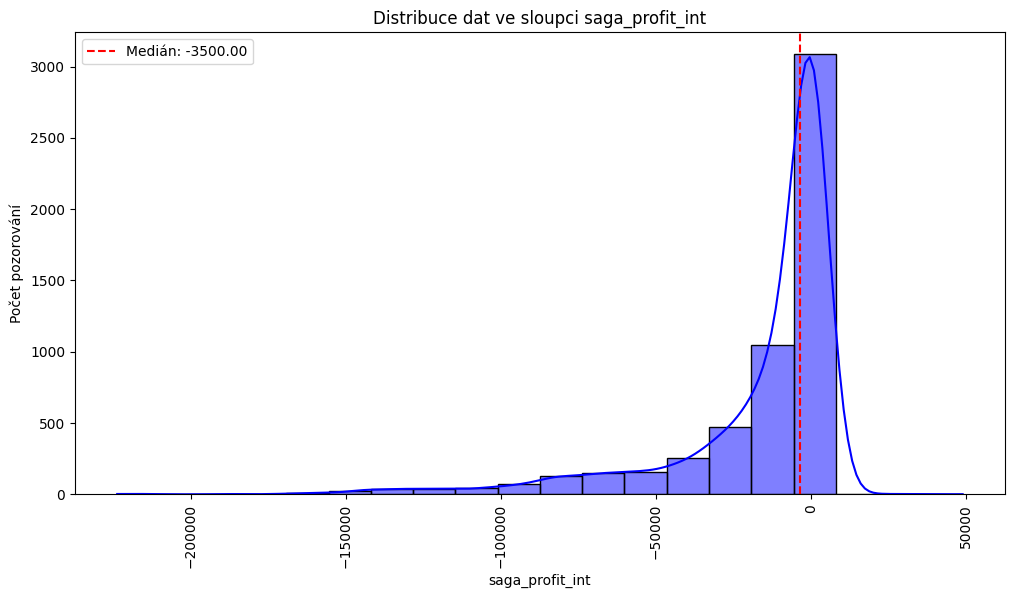

In [ ]:
# Filtrace dat tak, aby obsahovala pouze hodnoty do 200 000 včetně pro sloupec saga_profit_int
df_filtered_profit = df[df['saga_profit_int'] <= 200000]

# Vytvoření nového sloupce s rozdělením po 10 000 pro saga_profit_int
df_filtered_profit['saga_profit_interval'] = pd.cut(df_filtered_profit['saga_profit_int'], bins=range(-70000, 80001, 10000), right=False)

# Získání mediánu pro sloupec saga_profit_int
median_value_profit = df_filtered_profit['saga_profit_int'].median()

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření histogramu distribuce dat ve vytvořeném sloupci
ax = sns.histplot(data=df_filtered_profit, x='saga_profit_int', bins=20, kde=True, color='blue')
plt.xlabel('saga_profit_int')
plt.ylabel('Počet pozorování')
plt.title('Distribuce dat ve sloupci saga_profit_int')
plt.xticks(rotation=90)

# Přidání vertikální červené čáry označující medián
plt.axvline(x=median_value_profit, color='red', linestyle='--', label=f'Medián: {median_value_profit:.2f}')
plt.legend()

plt.show()

In [ ]:
median_saga_profit = df['saga_profit_int'].median()
print(f'Medián pro sloupec saga_profit_int: {median_saga_profit:.2f}')

Medián pro sloupec saga_profit_int: -3500.00


In [ ]:
mean_saga_profit = df['saga_profit_int'].mean()
print(f'Průměr pro sloupec saga_profit_int: {mean_saga_profit:.2f}')


Průměr pro sloupec saga_profit_int: -16017.02


SELECT
  event_name AS saga_game_start_event,
  COUNT(DISTINCT user_pseudo_id) AS pocet_uzivatelu
FROM
  `solitaire-tripeaks-cloud-city.analytics_286526366.events_*`
WHERE
  _table_suffix BETWEEN '20230901' AND '20231031'
  AND event_name LIKE 'saga_game_start_%'
  AND EXISTS (SELECT 1 FROM UNNEST(event_params) AS p WHERE p.key = "saga_id" AND p.value.string_value = "TreasureHunt")
GROUP BY
  event_name

In [ ]:
# data loading
dataset = pd.read_csv('/content/drive/MyDrive/bq-results-20231108-140453-1699452349510/bq-results-20231108-140453-1699452349510.csv', encoding='latin')
funnel = dataset.copy()

In [ ]:
funnel.shape

(25, 2)

In [ ]:
funnel.head

<bound method NDFrame.head of    saga_game_start_event  pocet_uzivatelu
0      saga_game_start_3             3353
1      saga_game_start_1             4068
2      saga_game_start_2             3770
3      saga_game_start_0             4883
4      saga_game_start_6             2464
5     saga_game_start_13             1013
6      saga_game_start_5             2673
7      saga_game_start_8             2043
8     saga_game_start_10             1326
9     saga_game_start_11             1214
10     saga_game_start_9             1715
11    saga_game_start_14              886
12    saga_game_start_15              736
13     saga_game_start_7             2301
14    saga_game_start_22              374
15     saga_game_start_4             3082
16    saga_game_start_21              397
17    saga_game_start_24              299
18    saga_game_start_19              498
19    saga_game_start_16              708
20    saga_game_start_18              570
21    saga_game_start_20              419
22  

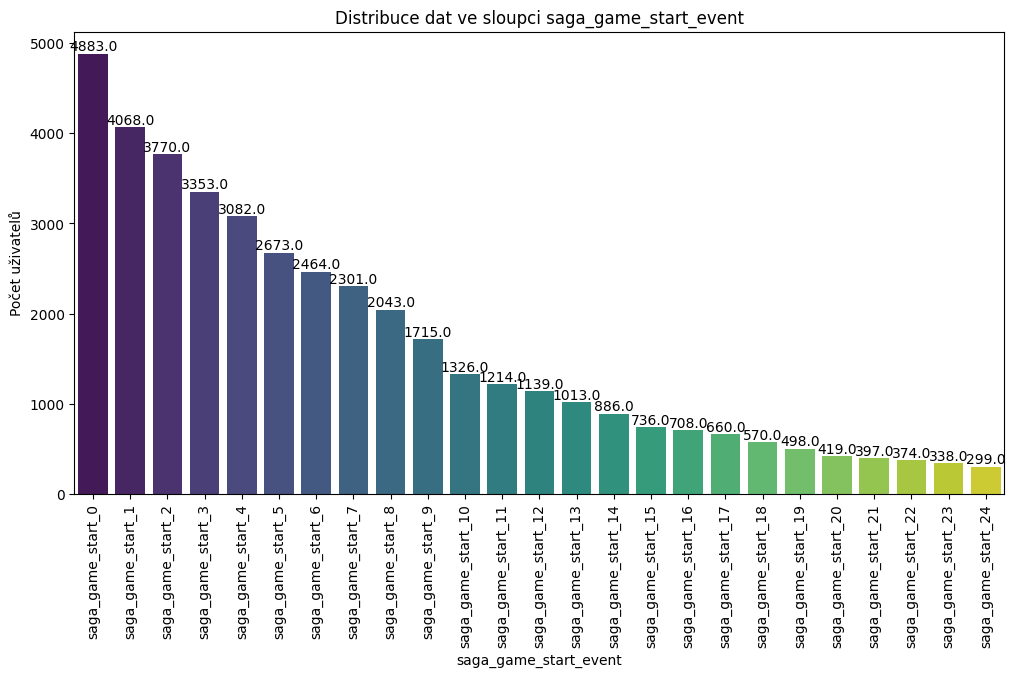

In [ ]:
# Seřazení dat dle sloupce 'pocet_uzivatelu'
funnel_sorted = funnel.sort_values(by='pocet_uzivatelu', ascending=False)

# Zvětšení šířky grafu pro vizualizaci
plt.figure(figsize=(12, 6))

# Vytvoření sloupcového grafu pro vizualizaci dat
ax = sns.barplot(data=funnel_sorted, x='saga_game_start_event', y='pocet_uzivatelu', palette='viridis')
plt.xlabel('saga_game_start_event')
plt.ylabel('Počet uživatelů')
plt.title('Distribuce dat ve sloupci saga_game_start_event')
plt.xticks(rotation=90)

# Přidání popisků k jednotlivým sloupcům (barům)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()